In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from fibmeasure.fitting.transforms import Binarize, Opening, CCSFilter, Skeletonize, LinFit

In [2]:
image = imread('./assets/sample_1.bmp')
image = rgb2gray(image).astype(np.float32)

data = {"image": image}

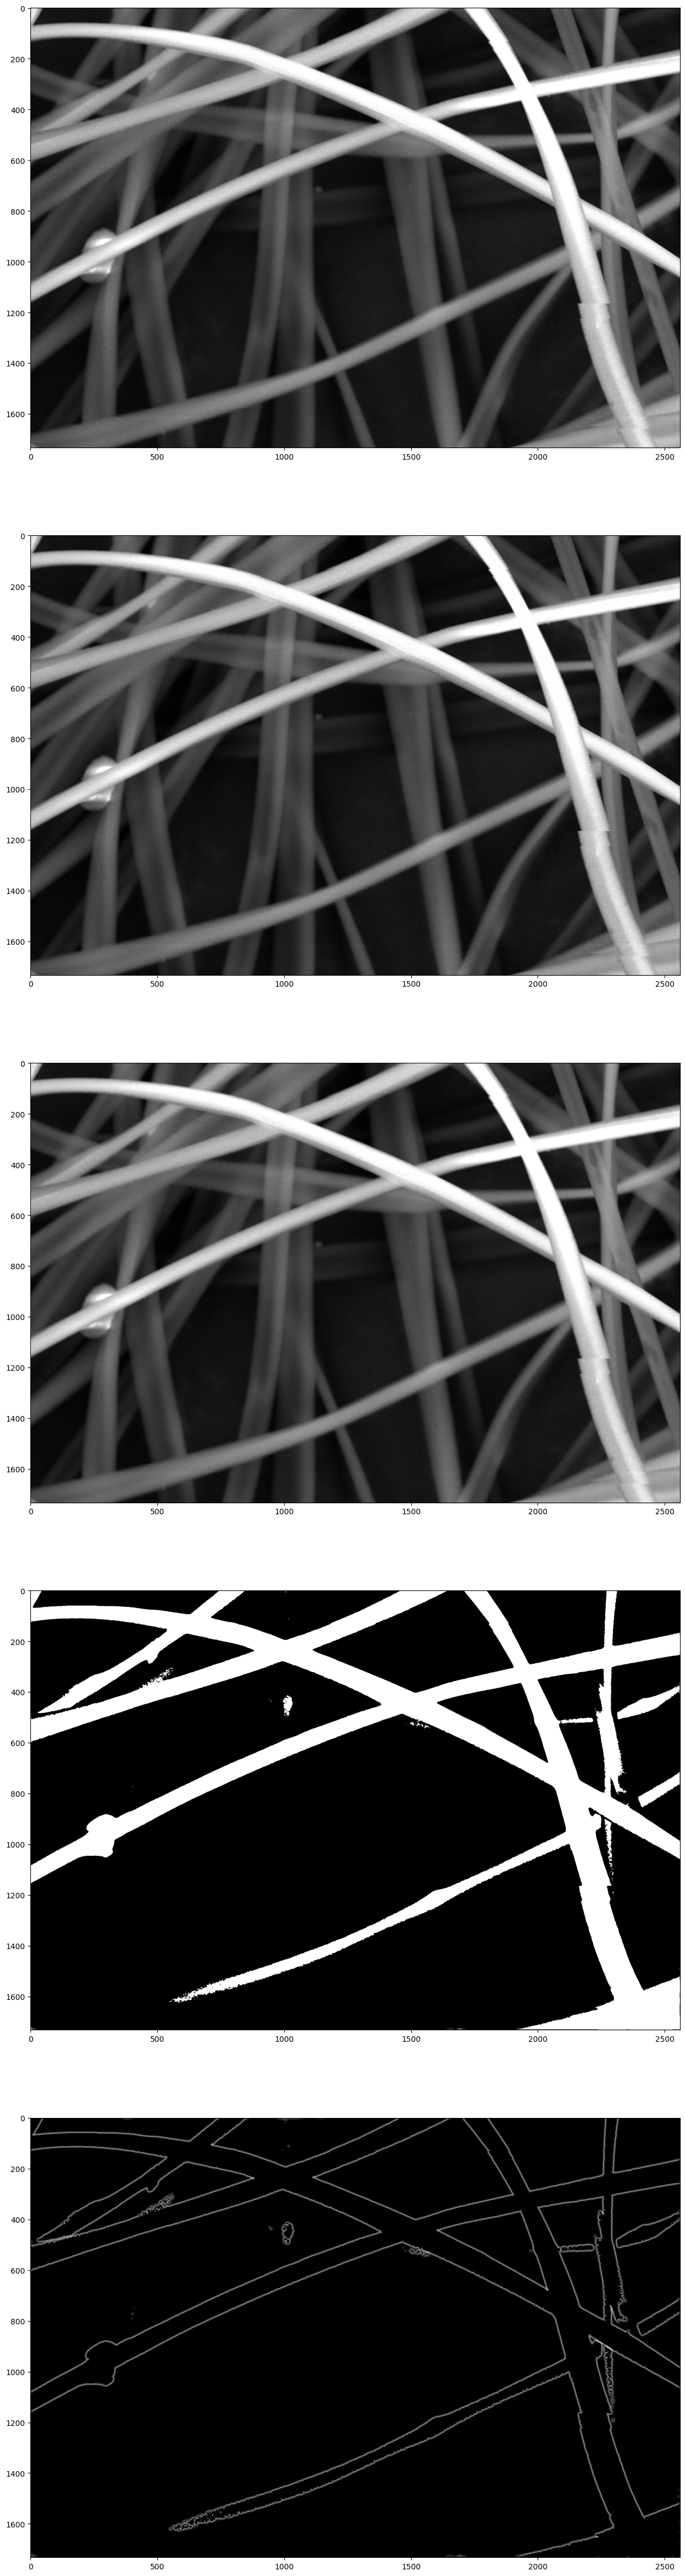

In [43]:
from skimage.restoration import richardson_lucy

psf = np.ones((5, 5)) / 25
deconvolved_RL = richardson_lucy(image, psf, num_iter=1)
bin_deconv_image = deconvolved_RL >= 0.5

images = [
    image,
    image_bayes,
    deconvolved_RL,
    bin_deconv_image,
]

fig, axes = plt.subplots(len(images), 1, figsize=(16, 12 * len(images)))

for im, ax in zip(images, axes):
    ax.imshow(im, cmap='gray')

In [60]:
%%timeit -r 5 -n 5
distances = distance_transform_edt(bin_deconv_image)

peaks = peak_local_max(distances, min_distance=1, threshold_abs=15, labels=bin_deconv_image)
peak_im = np.zeros_like(bin_deconv_image)
for x, y in peaks:
    peak_im[x, y] = True
peak_im = binary_dilation(peak_im)

105 ms ± 2.39 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)


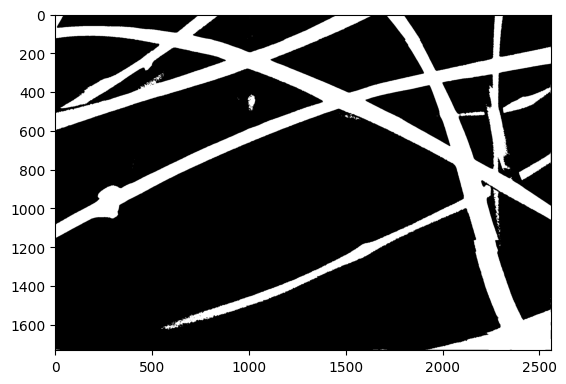

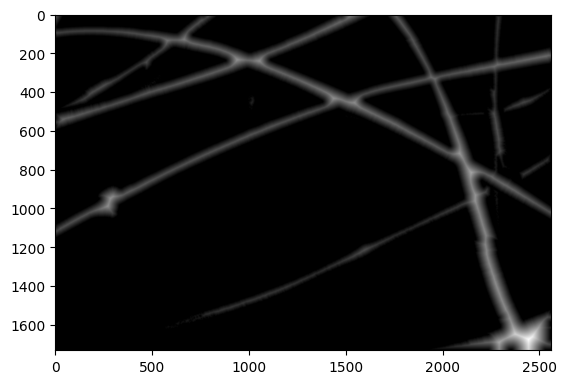

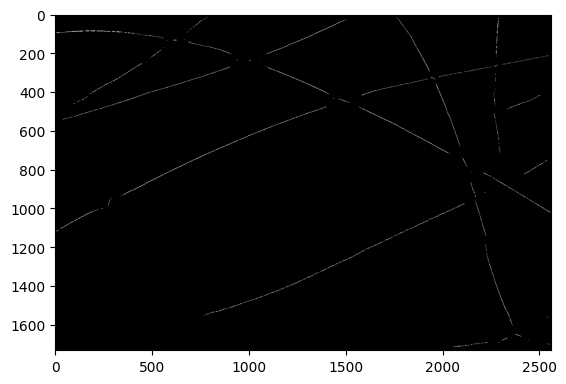

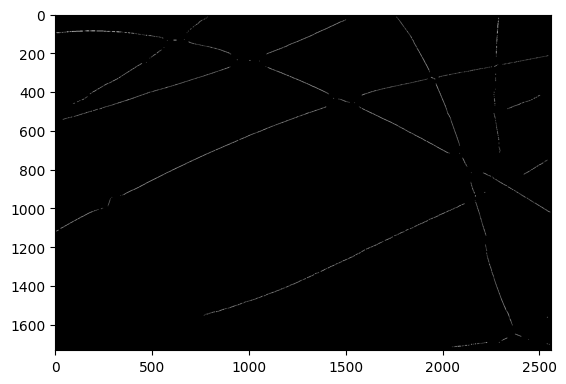

In [62]:
from imops import binary_dilation
from imops.morphology import distance_transform_edt
from skimage.feature import peak_local_max

distances = distance_transform_edt(bin_deconv_image)

peaks = peak_local_max(distances, min_distance=1, threshold_abs=15, labels=bin_deconv_image)
peak_im = np.zeros_like(bin_deconv_image)
for x, y in peaks:
    peak_im[x, y] = True
peak_im = binary_dilation(peak_im)

plt.imshow(bin_deconv_image, cmap='gray')
plt.show()

plt.imshow(distances, cmap='gray')
plt.show()

plt.imshow(peak_im, cmap='gray')
plt.show()

peaks = peak_local_max(distances, min_distance=1, threshold_abs=15)
peak_im_ = np.zeros_like(bin_deconv_image)
for x, y in peaks:
    peak_im_[x, y] = True
peak_im_ = binary_dilation(peak_im_)

plt.imshow(peak_im_, cmap='gray')
plt.show()

In [69]:
peaks = peak_local_max(distances, min_distance=1, threshold_abs=15)
peak_im = np.zeros_like(bin_deconv_image)
for p in peaks:
    peak_im_[*p] = True

In [3]:
transforms = [
    Binarize(), Opening(), CCSFilter(), Skeletonize(), LinFit()
]

In [4]:
result = data


for transform in transforms:
    result = transform(result)

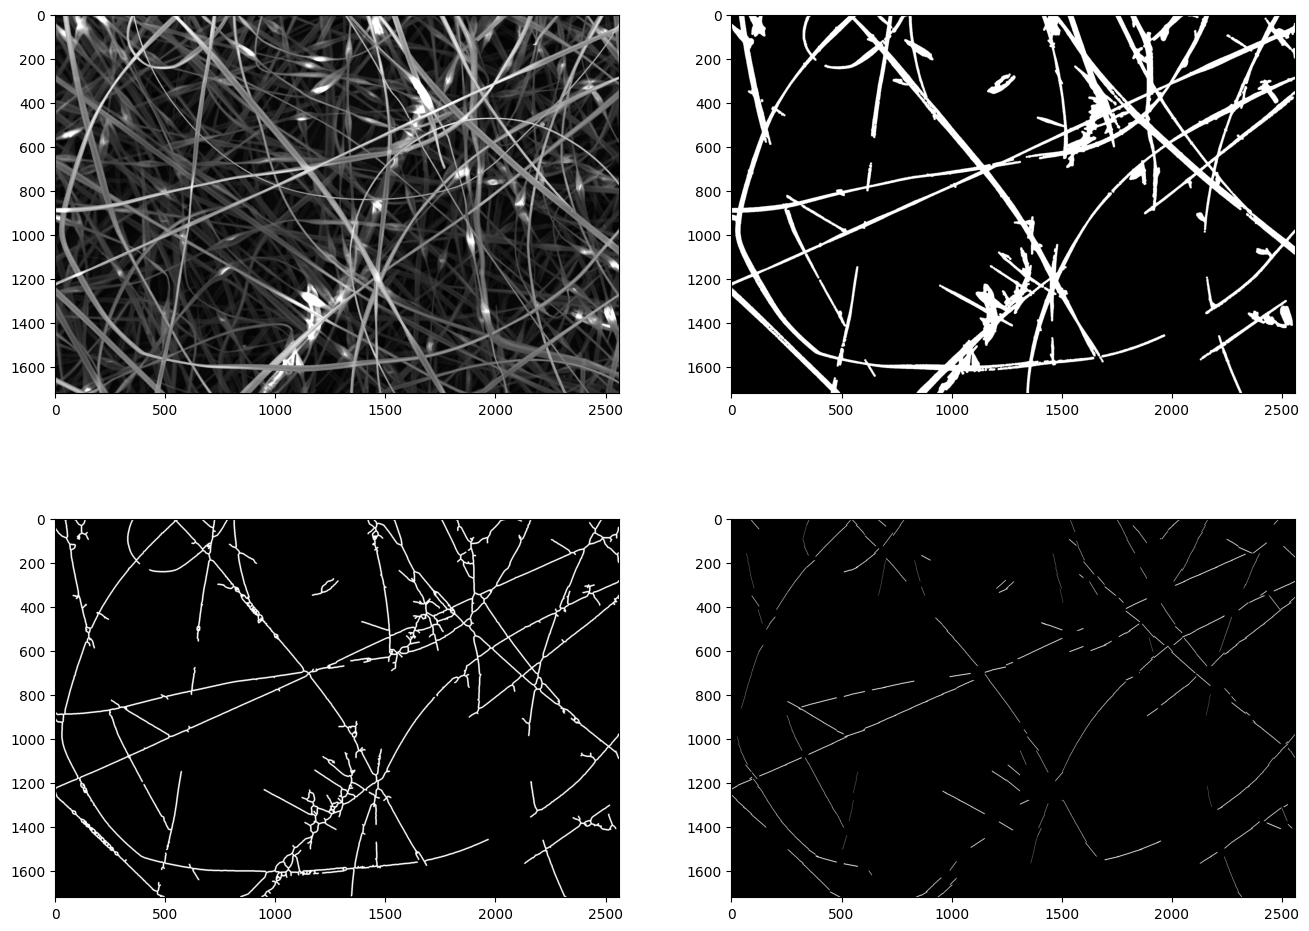

In [6]:
fig, axes = plt.subplots(2, len(result) // 2, figsize=(8 * len(result) // 2, 12))

for ax, image_like in zip(axes.reshape(-1), result.values()):
    ax.imshow(image_like, cmap='gray')